In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TD2 Exercise 2: K-means

**Data Points:**
- $A_1 = (2, 10)$
- $A_2 = (2, 5)$
- $A_3 = (8, 4)$
- $A_4 = (5, 8)$
- $A_5 = (7, 5)$
- $A_6 = (6, 4)$
- $A_7 = (1, 2)$
- $A_8 = (4, 9)$

**Initial Centroids:**
- Cluster 1: $A_1 = (2, 10)$
- Cluster 2: $A_4 = (5, 8)$
- Cluster 1: $A_7 = (1, 2)$

**Iteration Steps:**
1. **Assign Points to Clusters**: Calculate the Euclidean distance between each point and the centroids. Assign each point to the cluster of the nearest centroid.
2. **Update Centroids**: Compute the mean of all points in each cluster to update the centroids.
3. Repeat Steps 1 and 2 until the clusters stabilize (i.e., no points change clusters).


In [2]:
# Data points
points = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
])

# Initial centroids (A1, A4, A7)
centroids = np.array([
    [2, 10],  
    [5, 8],  
    [1, 2]  
])

In [3]:
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

In [4]:
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

# K-means algorithm with detailed iterations
max_iterations = 10
for iteration in range(max_iterations):
    print(f"\nIteration {iteration + 1}:")
    
    # Step 1: Assign points to the nearest centroid
    clusters = {i: [] for i in range(len(centroids))}  # Create empty clusters
    for point_idx, point in enumerate(points):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point_idx)
    
    for cluster_idx, cluster_points in clusters.items():
        print(f"Cluster {cluster_idx + 1}: {[points[i] for i in cluster_points]}")

    # Step 2: Recalculate centroids
    new_centroids = []
    for cluster_points in clusters.values():
        if cluster_points:  # Avoid empty cluster
            cluster_mean = np.mean(points[cluster_points], axis=0)
            new_centroids.append(cluster_mean)
        else:
            new_centroids.append(centroids[len(new_centroids)])  # Keep the previous centroid
    new_centroids = np.array(new_centroids)
    
    # Step 3: Check for convergence
    if np.allclose(new_centroids, centroids):
        print("\nCentroids have converged.")
        break

    centroids = new_centroids  # Update centroids

print("\nFinal Centroids:", centroids)



Iteration 1:
Cluster 1: [array([ 2, 10])]
Cluster 2: [array([8, 4]), array([5, 8]), array([7, 5]), array([6, 4]), array([4, 9])]
Cluster 3: [array([2, 5]), array([1, 2])]

Iteration 2:
Cluster 1: [array([ 2, 10]), array([4, 9])]
Cluster 2: [array([8, 4]), array([5, 8]), array([7, 5]), array([6, 4])]
Cluster 3: [array([2, 5]), array([1, 2])]

Iteration 3:
Cluster 1: [array([ 2, 10]), array([5, 8]), array([4, 9])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([2, 5]), array([1, 2])]

Iteration 4:
Cluster 1: [array([ 2, 10]), array([5, 8]), array([4, 9])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([2, 5]), array([1, 2])]

Centroids have converged.

Final Centroids: [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


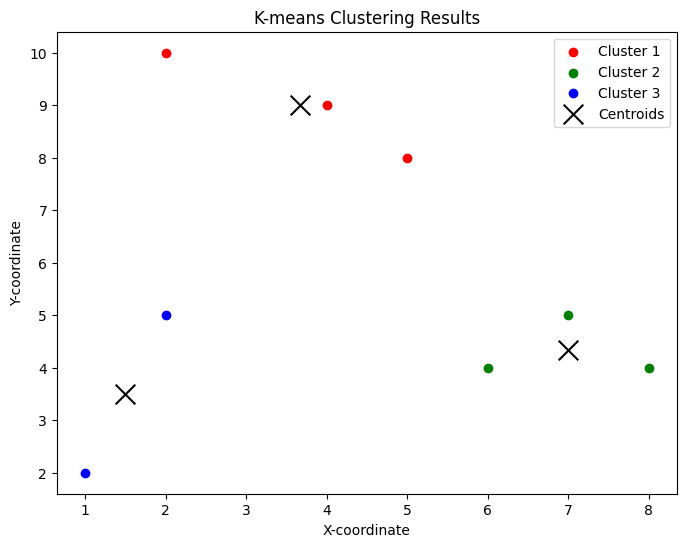

In [5]:
# Optional: Plot final clusters
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for cluster_idx, cluster_points in clusters.items():
    cluster_data = points[cluster_points]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_idx + 1}", color=colors[cluster_idx])
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', marker='x', s=200, label="Centroids")
plt.title("K-means Clustering Results")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.show()
